# Project - Acquire and Prepare Data from Web

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- This project will focus on Step 1 and 2 (**Acquire** and **Prepare**)
- We will read raw data that needs Data Wrangling to prepare
- The process we follow demonstrates how a Data Scientist works

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1.b: Retrieve/Read the data
- There are two options to get data
#### Option 1: Directly from wikipedia
- Assign variable ```url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"```
- Retrieve the data ```tables = pd.read_html(url)```
- Assign the first DataFrame to a variable
    - HINT: ```tables``` is a list DataFrame containing all the data

#### Option 2: From csv file (if option 1 fails)
- Use ```pd.read_csv()``` to read the file `files/fundraising.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [2]:
data=pd.read_html("https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics")

In [3]:
type(data)

list

In [4]:
len(data)

1

In [6]:
data

[       Year Source        Revenue       Expenses    Asset rise   Total assets
 0   2020/21    PDF  $ 162,886,686  $ 111,839,819  $ 50,861,811  $ 231,177,536
 1   2019/20    PDF  $ 129,234,327  $ 112,489,397  $ 14,674,300  $ 180,315,725
 2   2018/19    PDF  $ 120,067,266   $ 91,414,010  $ 30,691,855  $ 165,641,425
 3   2017/18    PDF  $ 104,505,783   $ 81,442,265  $ 21,619,373  $ 134,949,570
 4   2016/17    PDF   $ 91,242,418   $ 69,136,758  $ 21,547,402  $ 113,330,197
 5   2015/16    PDF   $ 81,862,724   $ 65,947,465  $ 13,962,497   $ 91,782,795
 6   2014/15    PDF   $ 75,797,223   $ 52,596,782  $ 24,345,277   $ 77,820,298
 7   2013/14    PDF   $ 52,465,287   $ 45,900,745   $ 8,285,897   $ 53,475,021
 8   2012/13    PDF   $ 48,635,408   $ 35,704,796  $ 10,260,066   $ 45,189,124
 9   2011/12    PDF   $ 38,479,665   $ 29,260,652  $ 10,736,914   $ 34,929,058
 10  2010/11    PDF   $ 24,785,092   $ 17,889,794   $ 9,649,413   $ 24,192,144
 11  2009/10    PDF   $ 17,979,312   $ 10,266,793   

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```

In [7]:
data_rev=data[0]

In [8]:
data_rev.head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
1,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
2,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
3,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"
4,2016/17,PDF,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197"


### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isna().any()```

In [7]:
data_rev.isna().any()

Year            False
Source          False
Revenue         False
Expenses        False
Asset rise      False
Total assets    False
dtype: bool

In [8]:
data_rev.dtypes

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

### Step 2.c: Delete Source Column
- The Column Source adds no value for further investigations
- You can delete it by 
    - ```del data['Source']```

In [9]:
data_rev=data_rev.drop(columns='Source')
data_rev.head()

,Year,Revenue,Expenses,Asset rise,Total assets
0,2020/21,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
1,2019/20,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
2,2018/19,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
3,2017/18,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"
4,2016/17,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197"


### Step 2.d: Convert Year column to numeric
- All the strings in years are formatted: 'YYYY/YYYY'
- To get the last year as string: ```data['Year'].str[-4:]```
- To convert that to numeric use: ```pd.to_numeric(...)```
    - HINT: You can assign the column directly

In [10]:
data_rev['Year']=data_rev['Year'].str[:4]
data_rev.head()

,Year,Revenue,Expenses,Asset rise,Total assets
0,2020,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
1,2019,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
2,2018,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
3,2017,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"
4,2016,"$ 91,242,418","$ 69,136,758","$ 21,547,402","$ 113,330,197"


### Step 2.e: Set Year to index
- To change a column to be the index use: ```data.set_index('Year', inplace=True)```
- Also sort the index in correct order: ```data.sort_index(inplace=True)```

### Step 2.f: Convert the remaining columns to numeric
- Remember the steps from the lesson
    - ```.str[2:]``` to remove the first two characters ('\$ ')
    - ```.str.replace(',', '')``` to remove commas
    - ```pd.to_numeric(...)``` converts string (containing well-formed number) to the numeric value
- Try to do it directly column by column

In [11]:
data_rev=data_rev.sort_values(by=['Year'])

In [12]:
data_rev.head()

,Year,Revenue,Expenses,Asset rise,Total assets
17,2003,"$ 80,129","$ 23,463","$ 56,666","$ 56,666"
16,2004,"$ 379,088","$ 177,670","$ 211,418","$ 268,084"
15,2005,"$ 1,508,039","$ 791,907","$ 736,132","$ 1,004,216"
14,2006,"$ 2,734,909","$ 2,077,843","$ 654,066","$ 1,658,282"
13,2007,"$ 5,032,981","$ 3,540,724","$ 3,519,886","$ 5,178,168"


In [13]:
data_rev.set_index('Year',inplace=True)

In [14]:
data_rev.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
2003,"$ 80,129","$ 23,463","$ 56,666","$ 56,666"
2004,"$ 379,088","$ 177,670","$ 211,418","$ 268,084"
2005,"$ 1,508,039","$ 791,907","$ 736,132","$ 1,004,216"
2006,"$ 2,734,909","$ 2,077,843","$ 654,066","$ 1,658,282"
2007,"$ 5,032,981","$ 3,540,724","$ 3,519,886","$ 5,178,168"


In [15]:
data_rev['REV']=data_rev['Revenue'].str[2:]
data_rev['EXP']=data_rev['Expenses'].str[2:]
data_rev['ASS']=data_rev['Asset rise'].str[2:]

In [16]:
data_rev.head()

,Revenue,Expenses,Asset rise,Total assets,REV,EXP,ASS
Year,,,,,,,
2003,"$ 80,129","$ 23,463","$ 56,666","$ 56,666","80,129","23,463","56,666"
2004,"$ 379,088","$ 177,670","$ 211,418","$ 268,084","379,088","177,670","211,418"
2005,"$ 1,508,039","$ 791,907","$ 736,132","$ 1,004,216","1,508,039","791,907","736,132"
2006,"$ 2,734,909","$ 2,077,843","$ 654,066","$ 1,658,282","2,734,909","2,077,843","654,066"
2007,"$ 5,032,981","$ 3,540,724","$ 3,519,886","$ 5,178,168","5,032,981","3,540,724","3,519,886"


In [24]:
data_rev['REV']=data_rev['REV'].str.replace(',','')
data_rev['EXP']=data_rev['EXP'].str.replace(',','')
data_rev['ASS']=data_rev['ASS'].str.replace(',','')

In [25]:
data_rev.head()

,Revenue,Expenses,Asset rise,Total assets,REV,EXP,ASS
Year,,,,,,,
2003,"$ 80,129","$ 23,463","$ 56,666","$ 56,666",80129,23463,56666
2004,"$ 379,088","$ 177,670","$ 211,418","$ 268,084",379088,177670,211418
2005,"$ 1,508,039","$ 791,907","$ 736,132","$ 1,004,216",1508039,791907,736132
2006,"$ 2,734,909","$ 2,077,843","$ 654,066","$ 1,658,282",2734909,2077843,654066
2007,"$ 5,032,981","$ 3,540,724","$ 3,519,886","$ 5,178,168",5032981,3540724,3519886


In [26]:
data_rev['REV']=pd.to_numeric(data_rev['REV'])
data_rev['EXP']=pd.to_numeric(data_rev['EXP'])
data_rev['ASS']=pd.to_numeric(data_rev['ASS'])

In [28]:
data_rev.dtypes

Revenue         object
Expenses        object
Asset rise      object
Total assets    object
REV              int64
EXP              int64
ASS              int64
dtype: object

### Step 2.g: Visualize data to investigate quality
- Make a simple plot of **Revenue**, **Expenses** and **Total assets**
- This will help you spot any outliers

<AxesSubplot:xlabel='Year'>

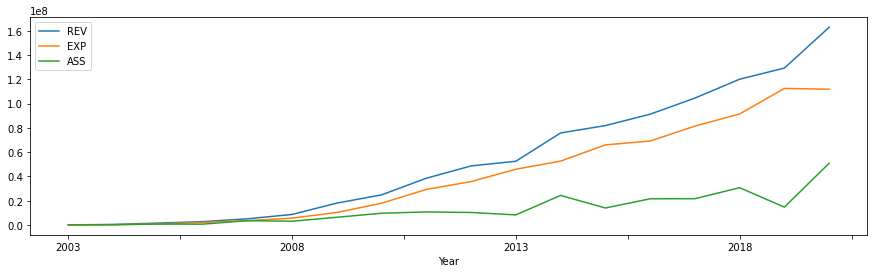

In [47]:
data_rev.plot(figsize=(15,4))

### Step 2.h: Visualize data to investigate quality
- Make a simple plot of **Asset rise**
- This will help you spot any outliers

<AxesSubplot:xlabel='Year'>

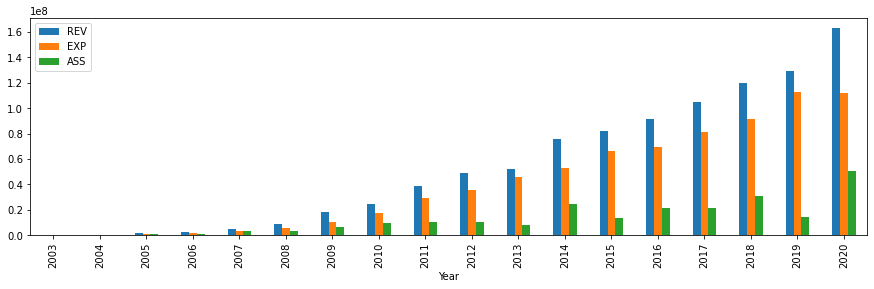

In [49]:
data_rev.plot.bar(figsize=(15,4))

In [66]:
data_rev.index

Index(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object', name='Year')

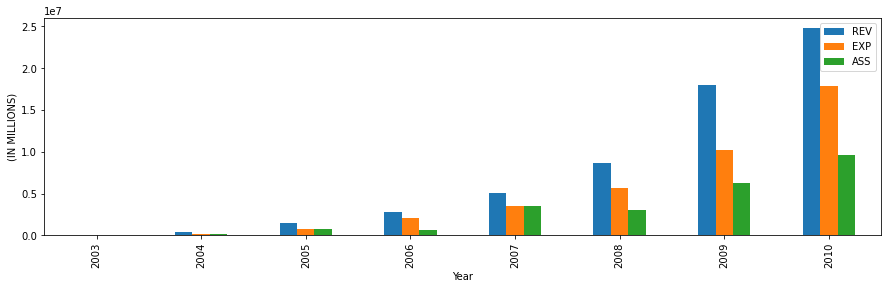

In [70]:
data_rev.loc[:'2010'].plot.bar(figsize=(15,4))
plt.ylabel("(IN MILLIONS)")
plt.show()

In [68]:
data_rev.describe()

,REV,EXP,ASS
count,1.800000e+01,1.800000e+01,1.800000e+01
mean,5.368524e+07,4.089545e+07,1.284320e+07
std,5.151336e+07,3.959745e+07,1.314937e+07
min,8.012900e+04,2.346300e+04,5.666600e+04
25%,5.939237e+06,4.059852e+06,3.170171e+06
50%,4.355754e+07,3.248272e+07,9.954740e+06
75%,8.889749e+07,6.833943e+07,1.982913e+07
max,1.628867e+08,1.124894e+08,5.086181e+07


In [71]:
data_rev.shape

(18, 7)